# __Etching Notebook__

### __Before you start the notebook please run the import section bellow.__

In [1]:
import numpy as np
import pandas as pd
from IPython.display import YouTubeVideo, display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata, interp1d
from matplotlib import cm
from base64 import b64encode
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

__Etching is used in microfabrication to chemically remove layers from the surface of a wafer during manufacturing.__ Part of the wafers are covered by a "mask" which is a layer which has different reacting proprieties to the etchant (generally it reacts a lot less), but it also needs to be easily patternable as it will  transfer its shape when the etching is done. Often this mask is a material which can be easily patternable with another process like photolithography for photoresist masks.
<br>
The __selectivity__ is the ratio of the etching rate of the layer against the one of the mask: $selectivity = \frac{etch\_rate_{layer}}{etch\_rate_{mask}}$. _When it is equal to one it means both get etched at the same time, if it is equal to 10 it means the layer gets etched 10 times faster._ It is a crucial parameter as it allows to _amplify_ patterns that needs to be transfered with high resolution.
<br>
There are two types of etching:
#### * _Wet etching:_
The substrat is placed in a liquid bath for removing the layer. It is based on the chemical reaction, the reaction depends on the layer that needs to be removed. Here are a  few examples: $Au$ etching with iodine chemistery ($Au + 2I^- → AuI2^- + 𝑒^-$), $SiO_2$ with $HF$ chemistery $SiO_2 + 6HF → H_2 SiF_6 + 2H_2O$, $Cr$ etching ($KMnO_4 + Na_3PO_4$). These examples shows you already the complexity and the diversity of possible reactions. 
<br>
The etching can change depending on the nature of the etchant and on the cristalline structure of the etched layer:
* _Anisotropic etching:_ in this case the material gets etch with the same rate in every direction. It results in rounded shapes and underetching of the mask.

* _Isotropic etching:_ in this case the ethching rate depends on the cristraline structure of the material as "atoms in certain planes are more bound than in other planes and is hence a direct consequence of the single-crystallinity". It will result in etching planes and no under etching of the mask. 

<br>

For instance an acidic baths etch Si in an isotropic way while an alkaline baths result in anisotropic etching.
<br>
Wet etching is somewhat outdated in production but proves to have some solid applications for some process. Also some materials are well etched with wet etched but not with dry processes. For instance wet etching is extensively used for cleaning of a substrat with the so called pihrana process. It can also be very usefull to release structured by using the triple point of the etchant to avoid capillary forces to destroy the resulting structure.
It can also be used for cleaning steps or to release structures 

#### * _Dry etching:_
Again a mask is used to protect the layer. However dry etching happends in a plasma environement where many different reactions of different type happend at the same time. As a result the mask gets etched a lot more than in wet etching where it was simply nescessary to find a chemical spicy which doesn't react with the etchant. 
<br> In dry etching, molecules in the gas (=dry) phase, typically in the 0.1-100 mbar pressure range react with the layer to remove it. An inert gas is brought to a plasma phase where it becomes highly reactive. As for wet etching the gas will depend on the material which needs to be etched.
<br> Fluorine chemistery, is one of the basis chemistery for dry etching as it can be an inert gas but becomes a reactive gas when in a plasma:
<br>
$CF_4 + 𝑒^- → CF_3^+ + F + 2𝑒^- $ and $CF_4 + 𝑒^- → CF_3 + F + 𝑒^- $. 
<br> For instance it can be used for the isotropic etch of the Si: $Si(s) +4F(g) → Si_3F_4(g)$

`Run the following cell to display the video on etching`

In [ ]:
mp4 = open('etching_clip.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=1000 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

_In the first part of the video you see a plasma etching process through the windows of the machine. The cycles of the glow show the cycle of the gas flow in the machine. In the second part it is a wet etching. In the wet etching, the protection equipment is highlighted as these processes require to manipulate dangerous fluids._

## Geometry of the etching

The following code allows you to visualise the cross section during an etching process. Theses visualizations are here to help you understand the three types of etching profile. Keep in mind that they are general cases and in reality the resulting profiles are more complexe as displayed in the class.
<br>
The first case is pure isotropic etching (use __case = 1__)
<br>
The second case is crystallographic etching (use __case = 2__)
<br>
The third case is anisotropic etching (use __case = 3__)
<br>
For the anisotropic etching you can also play with the value of the under `etch coefficient`.

In [1]:
#select the case value
case = 3
underetch_coeff = 0.1  # keep the value between 0 and 0.5 

In [4]:
%matplotlib widget

Si_thickness = 1
resist_thickness = 0.1
y_lim = 1.5
x_lim = 4
fig, ax = plt.subplots(figsize=(12, 6))
y = np.linspace(0, 0.3, 30)

if case == 1:
# Set up the plot elements
    #silicon
    silicon = plt.Rectangle((0, 0), x_lim, Si_thickness, color='darkblue', label='Silicon')
    ax.add_patch(silicon)

    #resist on top the the silicon
    resist_1 = plt.Rectangle((0, Si_thickness), 1, resist_thickness, color='red', label='Mask')
    resist_2 = plt.Rectangle((1.5, Si_thickness), 1, resist_thickness, color='red')
    resist_3 = plt.Rectangle((3, Si_thickness), 1, resist_thickness, color='red')
    ax.add_patch(resist_1)
    ax.add_patch(resist_2)
    ax.add_patch(resist_3)
    #1st trench
    trench_1 = plt.Rectangle((1, Si_thickness), 0.5, 0, color='white')
    wedge_1_l = mpatches.Wedge((1.01, 1), 0.1, 180, 270,color='white', ec="none")
    wedge_1_r = mpatches.Wedge((1.5, 1), 0.1, 270, 0,color='white', ec="none")
    ax.add_patch(trench_1)
    ax.add_patch(wedge_1_l)
    ax.add_patch(wedge_1_r)
    #2nd trench
    trench_2 = plt.Rectangle((2.5, Si_thickness), 0.5, 0, color='white')
    wedge_2_l = mpatches.Wedge((2.5, 1), 0.1, 180, 270,color='white', ec="none")
    wedge_2_r = mpatches.Wedge((3, 1), 0.1, 270, 0,color='white', ec="none")
    ax.add_patch(trench_2)
    ax.add_patch(wedge_2_l)
    ax.add_patch(wedge_2_r)

else:
    x1 = [1,1,1.5,1.5]
    y1 = [1,1,1,1]
    x2 = [2.5,2.5,3,3]
    y2 = [1,1,1,1]

    silicon = plt.Rectangle((0, 0), x_lim, Si_thickness, color='darkblue', label='Silicon')
    resist_1 = plt.Rectangle((0, Si_thickness), 0.99, resist_thickness, color='red', label='mask')
    resist_2 = plt.Rectangle((1.5, Si_thickness), 1, resist_thickness, color='red')
    resist_3 = plt.Rectangle((3, Si_thickness), 1, resist_thickness, color='red')
    trench_1 = patches.Polygon(xy=list(zip(x1,y1)), fill=True,color = 'white')
    trench_2 = patches.Polygon(xy=list(zip(x2,y2)), fill=True,color = 'white')


    ax.add_patch(silicon)
    ax.add_patch(resist_1)
    ax.add_patch(resist_2)
    ax.add_patch(resist_3)
    ax.add_patch(trench_1)
    ax.add_patch(trench_2)

    
# Set up the axes and labels
ax.set_xlim(0, x_lim)
ax.set_ylim(0, y_lim)
ax.axhline(y= Si_thickness, color='gray', linestyle='--', linewidth=1, label='Original Si height')
ax.legend()

    # Add title to the plot
title = ax.set_title('Title')
title.set_position([.5, 1.1]) # Adjust position of the title
title.set_fontsize(10) # Adjust font size of the title

def update(frame):
    etching_depth = y[frame]
    underetch = etching_depth * underetch_coeff  # Calculate underetching based on etching_depth

    silicon_height = Si_thickness - etching_depth  # Calculate remaining silicon height
    
    if case == 1:
        trench_1.set_height(etching_depth)
        wedge_1_l.set_radius(etching_depth)
        wedge_1_r.set_radius(etching_depth)
        wedge_2_l.set_radius(etching_depth)
        wedge_2_r.set_radius(etching_depth)
        trench_2.set_height(etching_depth)
        trench_1.set_y(silicon_height)  # Adjust downward oxide layer position
        trench_2.set_y(silicon_height)  # Adjust downward oxide layer position

    elif case == 2:
        # Update the trapezoid vertices
        x1 = [1, 1+ underetch, 1.5-underetch, 1.5 ]
        y1 = [1,silicon_height,silicon_height,1] 
        x2 = [2.5, 2.5+underetch, 3- underetch, 3 ]
        y2 = [1,silicon_height,silicon_height,1] 
        # Update the trapezoids
        trench_1.set_xy(list(zip(x1, y1)))
        trench_2.set_xy(list(zip(x2, y2)))
    elif case ==3:
            # Update the trapezoid vertices
        x1 = [1-underetch, 1, 1.5, 1.5 + underetch]
        y1 = [1,silicon_height,silicon_height,1] 
        x2 = [2.5-underetch, 2.5, 3, 3 + underetch]
        y2 = [1,silicon_height,silicon_height,1] 
        # Update the trapezoids
        trench_1.set_xy(list(zip(x1, y1)))
        trench_2.set_xy(list(zip(x2, y2)))

    ax.set_ylim(0,y_lim)

ani = FuncAnimation(fig, update, frames=len(y), interval=100, repeat=False)

plt.close()
# Display the animation in JupyterLab
html_code = ani.to_jshtml()
centered_html = f'<div style="display: flex; justify-content: center;">{html_code}</div>'
display(HTML(centered_html))

### Note about the plot
* Keep in mind that this is a simple illustration to understand the anisotropy of dry etching processes. If the underetch coefficient is too large the above structure will bend and eventually collapse. Also in normal cases the mask also gets etched (which is why the selectivity factor is important). Refer to the course on oxidation for more details as these special cases are dominant in certain processes.

# *Exercice Section*

 Etching is a very empirical science as it depends on the etched material but also includes plasma physics. As such most of the process are mainly studied empirically. The etching parameters will influence many parameters on the surface:
* __Etch rate__ of each of the etched elements (be careful to consider both the etched and mask material which don't evolve at the same rate and result in the selectivity of the process. You want it to be in the right range to well control the depth of etch. If the etch rate is too fast you will loose precision, if it is too slow then it can be a limiting step in your process.
* The __selectivity__ which is the ratio of the etch rate of your under layer/mask etch rate. It allows to transfer deep pattern in structures. It is a commonly used in many standard processes like the Bosch process which take advantage of it.
* The __polymerization point__, when you reach it the etching process doesn't etch anymore but end up only depositing polymer on the surface. It is a critical point because when you are close to it you can achieve very high selectivity but keep in mind it might also result in some residual polimerization on your surface. Once you pass that point you are only going to deposit polymers on your surface.
* __Roughness__ of the surface. The more you augment the bias and the more you augment the ICP power will lead to a high directionnality and speed of ion. This will result in a strong physical etch and a poor roughness due to the bombardment of ions.
* __Directionnality__ is controlable with the bias power. It accelerate the ions and lead to a greater directionnality of the flux. Thus low bias might lead to some underetch.


__Context:__ You are studing the etching of an SiO2 with a photoresist mask on top of it. A shape has been patterned in the photoresist and you want to transfer this shape to the SiO2. The mask covers the area where you want to have the SiO2 to be unaffected and is opened where you want to reduce the thickness of SiO2. 
To perform this etching you are using the [SPTS Advanced Plasma System (APS)](https://www.epfl.ch/research/facilities/cmi/equipment/etching/spts-aps/) module which is an ICP-based high density plasma source. This system was optimized for etching dielectrics (e.g. SiO2, SixNy, SiC, Al2O3, glass types…) which are usually difficult to etch using conventional RIE or ICP sources.
etching of SiO2 with PR mask.

_Keep in mind that any change in the parameters (etched material, mask material, machine or process used) will result in different result. However the impact of the coefficient with one another and on the process will be the same, just the values will change._



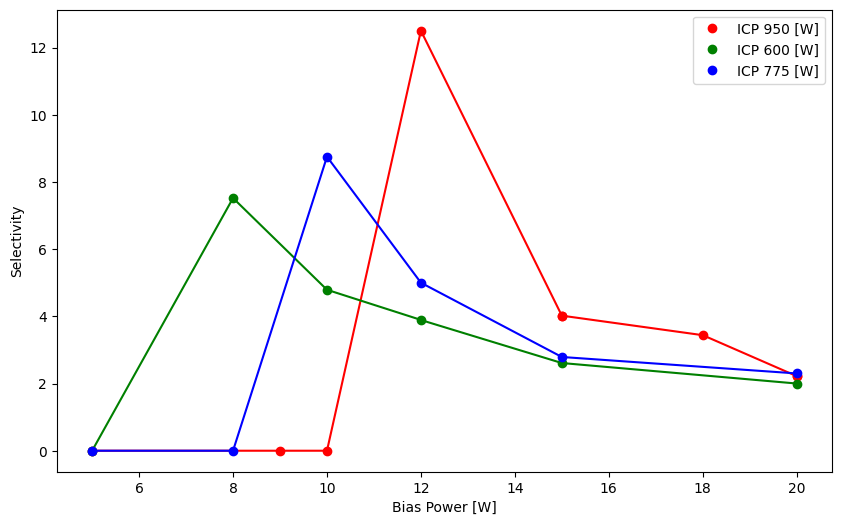

In [2]:
data = pd.read_csv("etching_data.csv")
# Assuming data is your DataFrame and it has a 'Bias' column
biases = data['ICP [W]'].unique()

# Create a colormap for the different bias groups
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))

for bias, color in zip(biases, colors):
    # Extract the data for this bias
    subset = data[data['ICP [W]'] == bias]
    
    # If there are less than 4 points, we skip this bias
    if len(subset) < 4:
        continue

    # Original data points
    x_ = subset['Bias [W]']
    y_ = subset['Selectivity']

    # Check if selectivity is zero and x_ is below a certain value
    x_val = 10  # replace this with your specific x value
    if np.all(y_ == 0) and np.all(x_ < x_val):
        plt.axvspan(x_.min(), x_.max(), color='grey', alpha=0.5)
        continue
    
    # Interpolation function
    f = interp1d(x_, y_)

    # Interpolated x values
    xnew = np.linspace(x_.min(), x_.max(), num=1000, endpoint=True)
    
    # Plot original points
    plt.plot(x_, y_, 'o', color=color, label=f'ICP {bias :.0f} [W]')
    
    # Plot interpolation
    plt.plot(xnew, f(xnew), color=color)

plt.xlabel("Bias Power [W]")
plt.ylabel("Selectivity")
plt.legend()
plt.show()


`Note that when the bias power goes under a certain value the selectivity drops down to zero. This indicates the polymerization point where there is more polymer deposition than etching because the power of the bias gets too small. A High ICP power leads to a larger selectivity but it is highly non linear. This can cause issues of reliability as the selecitivty might vary largely with small variations of the conditions during the process.`
<br>
`In practice it is very important to determine this point as most processes want to take advantage of the selectivity to transfer patterns. Once found it can be used as a working point where the rest of the parameters can be optimized`

This last section allows you to compare the effect of the variation of two parameters on two output parameters at the same time to better understand the influence of each of the parameters on the process.

interactive(children=(Dropdown(description='X-axis:', options=('Pressure [mT]', 'ICP [W]', 'Bias [W]', 'SiO2 e…

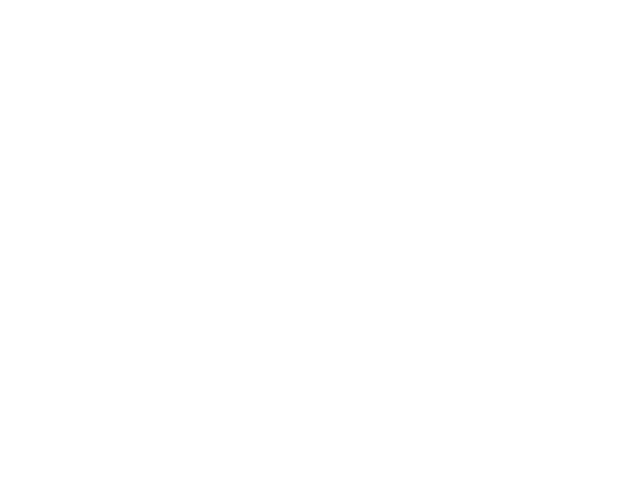

In [3]:
%matplotlib widget

# Function to plot a heatmap using different interpolation methods
def plot_heatmap(x, y, z, title, method):
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method=method)
    
    plt.figure()
    plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow)
    plt.colorbar()
    plt.scatter(x, y, c=z, cmap=plt.cm.rainbow, edgecolors='k')
    plt.xlabel('ICP Power [W]')
    plt.ylabel('Bias [W]')
    plt.show()

df = data.dropna()


# Define dropdowns
x_dropdown = widgets.Dropdown(options = df.columns, description='X-axis:', value='Pressure [mT]')
y_dropdown = widgets.Dropdown(options = df.columns, description='Y-axis:', value= 'ICP [W]')
z1_dropdown = widgets.Dropdown(options = df.columns, description='Z1-axis:', value = 'Selectivity')
z2_dropdown = widgets.Dropdown(options = df.columns, description='Z2-axis:', value = 'Resulting Ra')


def plot_heatmap(x, y, z, x_label, y_label, title, method, ax):
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    zi = griddata((x, y), z, (xi[None, :], yi[:, None]), method=method)
    
    contour = ax.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow)
    ax.scatter(x, y, c=z, cmap=plt.cm.rainbow, edgecolors='k')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(f'{title}')
    return contour


@interact(x=x_dropdown, y=y_dropdown, z1=z1_dropdown, z2=z2_dropdown)
def update_plot(x, y, z1, z2):
    x_data = df[x]
    y_data = df[y]
    z1_data = df[z1]
    z2_data = df[z2]
    
    # Clear previous plots
    plt.clf()
    
    # Create figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
 
    plt.colorbar(plot_heatmap(x_data, y_data, z1_data, x, y, z1, 'linear', ax1), ax=ax1)
    plt.colorbar(plot_heatmap(x_data, y_data, z2_data, x, y, z2, 'linear', ax2), ax=ax2)
    plt.tight_layout()
    plt.show()

## __This is the end of the etching notebook.__
## __Please go back to the main notebook.__